# graphic score ideation

- 2 elements to the piece:
  - improvised performance by a musician iterpreting the score, based on accompanying instructions
  - rhythmic/percussive accompaniment by mechanical sounds of drawing arm

- image and drawing arm
  - the score itself should follow certain patterns that the musician will be instructed to iterpret, this is the visual style of the piece. while indeterminate it should be consitent and recognisable accross many iterations
  - this drawing will feature rhythmic patterns (and possibly other, e.g. harmonic, timbral - experiment with drawing arm), these are the percussive accompaniment. they are time based and embedded into the drawing proccess.
  - rhythms possibly based on chord polyrhythms (maybe of a chord built using the hemi-pent scale 13457 or a cluster of the entire hept scale)
  - 1/1 5/4 11/8 3/2 15/8 (factors/multiples of 8)

  8/8:10/8:11/8:12/8:15/8 
  - use divisions of 5 (or mults of 5) to create more interesting relationships
  (or another odd no. or no. that isn't 8)
  - currently in 8th 8/8 notes as base metre
  - in order to be in 5s: 
    - 5/8:8 : 5/10:8 : 5/11:8 : 5/12:8 : 5/15:8
    - so, e.g. 5 beats of 15 against 8  
  - these metres can be used to time rhythmic modes/set patterns to create more interesting interactions

  - ! timing may depend on responsiveness of drawing machine !

- music
  - played on harp
  - tuned to major with a half sharp fourth 1 2 3 ^4 5 6 7 
  - possible focus on 1 3 ^4 5 7 subset
  - improvised using descending glissandi; sweeping motions with a higher probability of being downward rather than upward (this probability can be dynamic)
  - a harp "falling down stairs of light" - concept/name of piece

  - the machine will start drawing and then the musician will start reading it once it has drawn something (machine sould draw fast enought for the musician to play at the correct tempo)
  - the piece will be interpreted live as it is drawn

  - possibly work in motifs into the piece, for the performer to improvise off of, and/or to include in the score

  - similar in stlye to "love's song"? - combining all elements, interlaced at once (noise, free improvisation, motifs, etc)

 -  3rd musical element
   - playing samples of field recordings/ambient non-musical sounds
   - have samples run into a mixer and give the performer instructions to use them
     - parameters of fade-in/out duration, volume, duration of play
     - layer and overlap sounds
     - sound quality/timbre?
   - performer interprets from the score


 - current concept for music
   - 2 drawing machines drawing 2 scores for 2 performers
   - both drawing machines mic'd up (possibly split polyrhythms between them based on 4:3 5:4 relationships, e.g. 15:12 vs. 10:8)
   - performer 1 interprets 1 score to play harp
   - performer 2 interprets the other to play the samples/mixer
   - possible use of effects/techniques such as delay and feedback loops


 - possible 4th musical element:
   - use same operations that generate score and rhythms to generate harmonic/noise/sample based sound via supercollider (audio software)
   - as well as adding another layer, this can enable the piece to be an installation as well as a performance
   - installation version can be reprogrammed to be more ambient and/or have more dynamic range so it varies from slow/ambient to intense/noisy


# graphic score aesthetic / style

- make use of descending/ascending lines to represent glissandi?
  - lines may make rhythmic movements with the machine more reliable by adding "bumps"/kinks in to the lines

- alternatively dots may be used to represent individual notes sounding

- continuously draw over itself, returning to the top of the page, for as long as the piece lasts - so the music can be somewhat continuous

- draw in lines, so the next pass from the top, it can draw in between previous lines
  - without much care for overlap - maybe some intentional (e.g. start second line closer to first with more space to the side/below depending on orientation)

- draw lines verticaly, top-bottom, from right-left (left-right?)
  - draw landscape on paper

- e.g. line may have a lot of horizontal wiggle room and overlap
  - first lines may be centred at x = 10, x += 20, with a wiggle room of 10.
  - the second pass may be drawn at x = 15, x += 20
  - each new pass drawing x += 5 from the start line of the prev pass
  - filling the space between lines gradually from start to end, with intentional overlap built in to each new line

- current idea for final piece: 
  - might look like a series of overlapping downward squiggles, with less upward squiggles overlapping, containing rhythmic patterns and gaps for rests (considering drawing arm speed and movements for readjustment)
  
- can use line tracing code as a basis?

librosa - python library

# references

graphic scores:

- toru takemitsu - corona
- john cage - fontana mix
- cornelius cardew - treatise

- ICA ceatives sound
  - for completely open/less obviously musical style of graphic score

music: 

- my own piece - love's song
  - as a similar style for the sound of the piece

# beginning the code

simplified assumtions to start with:

- drawing speed is at the tempo I want
- drawing speed is the same when the pen is down and when up

basic idea: 

- vertical/diagonal lines drawn downwards (vertical to start?)
- along the full length of a line (~ canvas height), divide the line into nodes signifiying the beats in the polymeters (over the time to draw a line e.g. 10s at 90bpm)
  - 1 beat can be an 8th or 16th (2* or 4* 90bpm) note at in the base rhythm/metre 8
- determine rhythmic patterns (e.g. bounce of an object falling - series of increasingly short durations)
- using chance apply rhythmic patterns along the nodes for each cross-rhythm
- add/subtract where they overlap to create deviations/curves/kinks in the lines
- these kinks should create a rhythmic sounds when the machine draws the score
  - the resulting rhythms may be complex and not very coherent (random sounding)

polyrhythm - 15:12:11:10:8
if it takes 8 seconds to draw a line, the polyrhythm could repeat twice with the base rhythm 8, occuring within 4 second at 2 beats/second
- therefore each line needs an overlapping series of evenly spaced nodes in groups of 16, 20, 22, 24 and 30

the line tracing code can be used as a start point.

In [36]:
from py5canvas import *

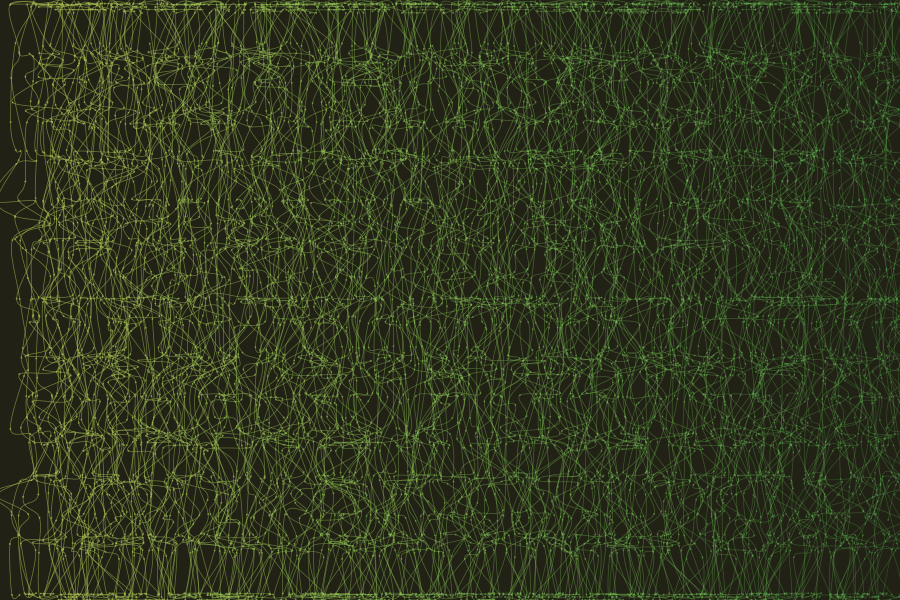

'\n - spacing uneven\n - the line needs points at line_length / each polyrhythm_node number\n\n - create array of node position y vals\n - when drawing, if y == any node pos, draw until the next node pos\n  -  I want only nodes of the same cross-rhythm to connect - ones of others will be summed together after\n - in order to draw one line consisting of all these values: \n  - calculate line values for each component rhythm of the polyrhythm\n  - sum these values together to get the values for the final line\n  - draw with totalled values\n\n - needed: \n  - calculate_line function\n  - line_calc list to store calculated lines\n  - sum_line function\n\n - to draw multiple passes of lines:\n  - use modulo to start from the beginning? \n   - or use if: and an x_counter to say if x_counter >= width x = x_init_pos + x_offset\n   - then continue to reuse function with x += line_spacing on top of the offset\n  - offset x by a small amount for the next row of lines \n  - do this until x_offset

In [ ]:
import random
import numpy as np

create_canvas(900, 600)

no_fill()
background(33,33,22)
stroke(150,200,100,233)
stroke_weight(0.33)

line_spacing = 33 # the distance that the vertical lines are apart

# initial pen position
x, y = 0, 0

def draw_line(x_random, sum_lin):
    # Draws a curve connecting a list points [[x1, y1], [x2, y2], ...]
    stroke_weight(0.75)
    no_fill() # stops lines being filled in as a shape
    begin_shape()
    for i in range(len(sum_lin)):
        curve_vertex(x + x_random[i], sum_lin[i] + y_offset)
    end_shape()

polyrhythm_nodes = [8,10,11,12,15] # 15:12:11:10:8 polyrhythm
line_calcs = []
summed_line = []

def calc_lines(): # separate into 2 functions calc and sum - better modularity?
    global line_calcs, summed_line

    line_calcs = []
    summed_line = []

    for lin in range(int(width/line_spacing)):
        summed_line.append([]) # create new nested array for each line
        
        # calculate y values for each component pulse in the polyrhythm 
        for i in range(len(polyrhythm_nodes)):
            calc_y = 5
            line_calcs.append([])
            for j in range(polyrhythm_nodes[i]):
                line_calcs[i].append(calc_y)
                calc_y += int((height-10)/polyrhythm_nodes[i])
                # print(calc_y)

        # sum calculated line nodes (todo: sum rhythms/patterns expressed via x vals) into 1 line
        for i in range(len(polyrhythm_nodes)):
            for j in range(polyrhythm_nodes[i]):
            # 1/3 chance that a pulse is selected for use per component pulse - random pattern generation
                node_select = np.random.normal(1.167,1.167) # resolution of polyrhthm - was random.uniform(0,2.33)
                # print(node_select) 
                if node_select < 1.0: 
                    summed_line[lin].append(line_calcs[i][j])
            if node_select < 1.0: 
                summed_line[lin].append(height-5)   
        summed_line[lin].sort() # not necessary, but good for readability 

# calc_lines()

# print(summed_line)

y_offset = 0
def draw_circles():
    global x, r_val, g_val, alpha_val

    r_val = 170
    g_val = 186
    b_val = 80
    alpha_val = 155

    

    for lin in range(int(width/line_spacing)): 
        x_random = []

        for i in range(len(summed_line[lin])):
            stroke(r_val, g_val, 80, alpha_val)

            x_random.append(np.random.normal(7,12)) 
            # generate randomised x vals, the same for each circle and equiv line bend and store in list
            
            stroke_weight(1)
            fill(r_val, g_val, b_val, alpha_val)
            circle(x + x_random[i], summed_line[lin][i] + y_offset, 1)#random.uniform(4,5))
            r_val -= 0.1
            g_val += 0.02
            b_val += 0.2
            alpha_val -= 0.125
            # print(r_val, g_val, b_val, alpha_val)

        draw_line(x_random, summed_line[lin])
        # store all x values for a line to be called at once in the draw_line() loop per line

        # move to the right
        x += line_spacing

draw_pass = 0
def draw_passes():
    global x, y_offset, draw_pass
    x_init = 11
    x_offset = 0

    x = x_init
    
    while draw_pass <= 11: # higher than division of ~line_spacing to cause overlap
        calc_lines()

        draw_circles()
        
        draw_pass += 1
        x_offset += (line_spacing*1.104)/7 # adding some interesting displacement in overlap
        y_offset += random.uniform(-1, 3)
        x = x_init + x_offset

    
draw_passes()

# show()

'''
 - spacing uneven
 - the line needs points at line_length / each polyrhythm_node number

 - create array of node position y vals
 - when drawing, if y == any node pos, draw until the next node pos
  -  I want only nodes of the same cross-rhythm to connect - ones of others will be summed together after
 - in order to draw one line consisting of all these values: 
  - calculate line values for each component rhythm of the polyrhythm
  - sum these values together to get the values for the final line
  - draw with totalled values

 - needed: 
  - calculate_line function
  - line_calc list to store calculated lines
  - sum_line function

 - to draw multiple passes of lines:
  - use modulo to start from the beginning? 
   - or use if: and an x_counter to say if x_counter >= width x = x_init_pos + x_offset
   - then continue to reuse function with x += line_spacing on top of the offset
  - offset x by a small amount for the next row of lines 
  - do this until x_offset >= line_spacing
'''

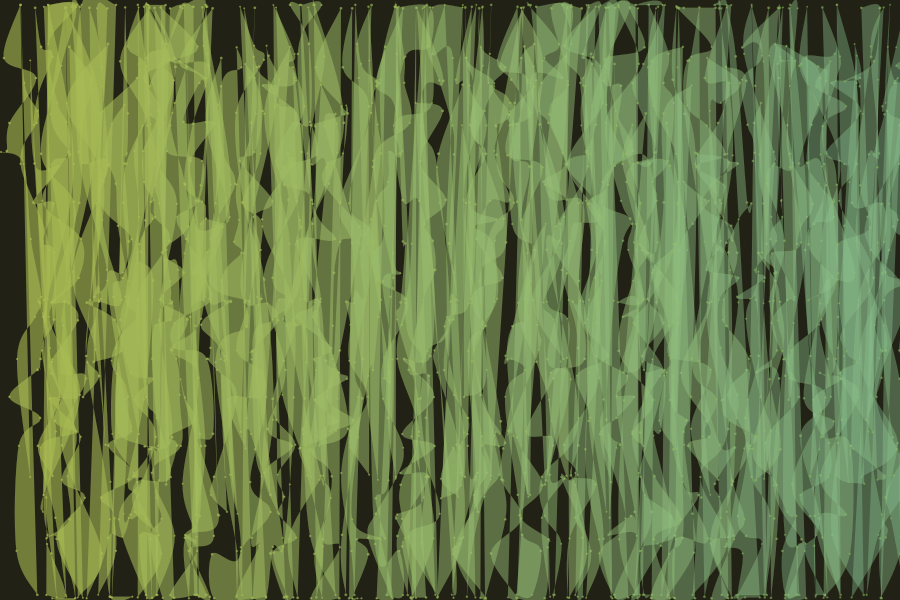

In [ ]:
# aesthetically pleasing/impractical version

import random

create_canvas(900, 600)

no_fill()
background(33,33,22)
stroke(150,200,100,233)
stroke_weight(0.33)

line_spacing = 33 # the distance that the vertical lines are apart

# initial pen position
x, y = 0, 0

def draw_line(x_random, sum_lin):
    # Draws a curve connecting a list points [[x1, y1], [x2, y2], ...]
    stroke_weight(0.2)
    # abscence of no_fill() leaves verices to be filled in as shapes
    begin_shape()
    for i in range(len(sum_lin)):
        curve_vertex(x + x_random[i], sum_lin[i] + y_offset)
    end_shape()

polyrhythm_nodes = [8,10,11,12,15] # 15:12:11:10:8 polyrhythm
line_calcs = []
summed_line = []

def calc_lines(): # separate into 2 functions calc and sum - better modularity?
    global line_calcs, summed_line

    line_calcs = []
    summed_line = []

    for lin in range(int(width/line_spacing)):
        summed_line.append([]) # create new nested array for each line
        
        # calculate y values for each component pulse in the polyrhythm 
        for i in range(len(polyrhythm_nodes)):
            calc_y = 5
            line_calcs.append([])
            for j in range(polyrhythm_nodes[i]):
                line_calcs[i].append(calc_y)
                calc_y += int((height-10)/polyrhythm_nodes[i])
                # print(calc_y)

        # sum calculated line nodes (todo: sum rhythms/patterns expressed via x vals) into 1 line
        for i in range(len(polyrhythm_nodes)):
            for j in range(polyrhythm_nodes[i]):
            # 1/3 chance that a pulse is selected for use per component pulse - random pattern generation
                node_select = random.uniform(0,5) # resolution of polyrhthm
                # print(node_select) 
                if node_select < 1.0: 
                    summed_line[lin].append(line_calcs[i][j])
            if node_select < 1.0: 
                summed_line[lin].append(height-5)   
        summed_line[lin].sort() # not necessary, but good for readability 

# calc_lines()

# print(summed_line)

y_offset = 0
def draw_circles():
    global x, r_val, g_val, alpha_val

    r_val = 170
    g_val = 186
    b_val = 80
    alpha_val = 155

    

    for lin in range(int(width/line_spacing)): 
        x_random = []

        for i in range(len(summed_line[lin])):
            stroke(r_val, g_val, 80, alpha_val)

            x_random.append(random.uniform(-12,31))
            # if draw_line() is called from this loop, vertex shapes are much denser - blurred lines effect
            
            stroke_weight(1)
            fill(r_val, g_val, b_val, alpha_val)
            circle(x + x_random[i], summed_line[lin][i] + y_offset, random.uniform(1,2))
            r_val -= 0.1
            g_val += 0.02
            b_val += 0.2
            alpha_val -= 0.167
            # print(r_val, g_val, b_val, alpha_val)

        draw_line(x_random, summed_line[lin]) # store all x values for a line to be called at once in the draw_line() loop per line
        # move to the right
        x += line_spacing

draw_pass = 0
def draw_passes():
    global x, y_offset, draw_pass
    x_init = 11
    x_offset = 0

    x = x_init
    
    while draw_pass <= 5: # higher than division of ~line_spacing to cause overlap
        calc_lines()

        draw_circles()
        
        draw_pass += 1
        x_offset += (line_spacing*1.104)/4 # adding some interesting displacement in overlap
        y_offset += random.uniform(-1, 3)
        x = x_init + x_offset

    
draw_passes()

# show()

In [113]:
# adding dynamic changes to the score 
# create a function the determines dynamic fluctuation per pass of the canvas and dynamics for the piece
# - e.g. higher concentration of nodes and x variation at x1/width, x2/width, etc for one pass
# - higher conentration of nodes and x deviation centred on pass 7 of 11 (or 5 and 9 of 11), etc
# - also determine degree of concentration/increase

import random
import numpy as np

create_canvas(900, 600)

no_fill()
background(33,33,22)
stroke(150,200,100,233)
stroke_weight(0.33)

line_spacing = 33 # the distance that the vertical lines are apart

# initial pen position
x, y = 0, 0

def draw_line(x_random, sum_lin):
    # Draws a curve connecting a list points [[x1, y1], [x2, y2], ...]
    stroke_weight(0.75)
    no_fill() # stops lines being filled in as a shape
    begin_shape()
    for i in range(len(sum_lin)):
        curve_vertex(x + x_random[i], sum_lin[i] + y_offset)
    end_shape()

polyrhythm_nodes = [8,10,11,12,15] # 15:12:11:10:8 polyrhythm
line_calcs = []
summed_line = []

def calc_lines(): # separate into 2 functions calc and sum - better modularity?
    global line_calcs, summed_line

    line_calcs = []
    summed_line = []

    for lin in range(int(width/line_spacing)):
        summed_line.append([]) # create new nested array for each line
        
        # calculate y values for each component pulse in the polyrhythm 
        for i in range(len(polyrhythm_nodes)):
            calc_y = 5
            line_calcs.append([])
            for j in range(polyrhythm_nodes[i]):
                line_calcs[i].append(calc_y)
                calc_y += int((height-10)/polyrhythm_nodes[i])
                # print(calc_y)

        # sum calculated line nodes (todo: sum rhythms/patterns expressed via x vals) into 1 line
        for i in range(len(polyrhythm_nodes)):
            for j in range(polyrhythm_nodes[i]):
            # 1/3 chance that a pulse is selected for use per component pulse - random pattern generation
                node_select = np.random.normal(1.167,1.167) # resolution of polyrhthm - was random.uniform(0,2.33)
                # print(node_select) 
                if node_select < 1.0: 
                    summed_line[lin].append(line_calcs[i][j])
            if node_select < 1.0: 
                summed_line[lin].append(height-5)   
        summed_line[lin].sort() # not necessary, but good for readability 

'''
dynamics function:

- 1 peak through whole piece (macro)
- 1 or 2 peaks per pass of the canvas (micro)

- macro peak determined by 5ths of the whole piece (no. of passes/5) 
- one of those fifths is the choses as the point to centre it (0-5)
 - (lines in?) passes either side are then have dynamics applied relatively using gaussian distribution
 - dynamics of a pass impact the randomisation params of node density and x variation

- whether 1 or 2 micro peaks (per pass) first determined
 - if 1 the first is determined by dividing the width of the canvas by 5 (0-5)
 - if 2 the second divides it by 7 (so they do not overlap + more interesting relationship - 7:5 ratio) (0-7)
- micro dynamics impact the randomisation params of node density and x varaiation
- a gaussian dist is centered at the point on the canvas determined for the peak, lines drawn are then impacted by it

implementation: 
- randomisation params can be determined by the function, then passed in to the other functions as parameters, to avoid using global variables
 - params of the functions they are passed into can be given default values so it will still generate if there is a problem (reduce coupling?)

randomisation:
- random generators ure used in:
 - calc_lines() - node_select ; controls node density
 - draw_circles() - x_random ; controls x variation
- for node_select it is better to change the condition in the if: than the params of the random.normal(), as too high a range in the random can cause an error
- call calc_lines() and draw_circles() from dynamics()
 - pass in the randomisation/conditional values as params taken by the recieving funcs

how to apply gaussian distribution:
 - track current pass no. and line/node x val
 - determine the range and intensity of dynamic changes using gaussian dist
  - (also determine how high and low dynamics can go)
 - determine range of distribution - lowest and highest line x vals and pass no.s it applies to
 - if a line or pass falls within that range, scale (multiply?) the randomisation vals by its pos in the bell curve of the dist
  - also determine the intensity (val at centre of peak/bell) of each peak 
 - make the dynamic scale 0.0 to 1.0
  - at 1.0 it is at it's highest, at 0.0 (poss. < 0.01 or smth) it is a default
  - macro can range from 0.5 to 1.0 at it's peak/centre
  - micro can range from 0.167 to 0.667
  - in combination they can exceed 1.0

  - using random.normal(): 
   - the centre is the pass or x val where the peak will be
   - the range will be the number in passes or x val either side that I choose
    - use a separate random.normal() for each, as the ranges will be totally different numbers
   - the current pass and x val of a line/node will be tracked
   - every time it is updated (per pass or new node), the random.normal() is called:
   - if the line or pass == the number generated the dynamics are applied
   - this chance should increase as it reaches the centre and decrease when it is further away
   - to begin with use just one set of vals for the random params the dist is applied to



differences in intensity between micro and macro
 - micro cannot go as high
 - macro has a higher limit of intensity and is added to micro

the function:

- determine micro dynamics uniquely for each pass
- run chance operations in a loop for the no. of passes (pass in as param)
  - determine no. of peaks 1 or 2 for a pass of the canvas
  - divide into 5ths and 7ths accordingly
  - determine which 5th and 7th to use
  - apply gaussian dist to lines drawn on that pass of the canvas

- macro dynamics only need determining once for each version of the piece
  - pass in no. of passes as a param
  - divide by 5 to get the pass numbers (round if a decimal: int(passes/5)?)
  - randomly select which 5th to use
  - apply gaussian dist to all passes centred on determined 5th
'''

def dynamics(passes):
    fifths = [0,1,2,3,4,5]
    sevenths = [0,1,2,3,4,5,6,7]

    macro_pos = int((passes/5) * random_choice(fifths)) # gives which pass to centre gaussian dynamic peak on

    micro_pos = []

    for p in range(passes): # do for each pass
        micro_pos_num = random.uniform(0,1)
        if micro_pos_num < 0.5:
            micro_pos.append([int((width/5) * random.choice(fifths))])
        else:
            micro_pos.append([int((width/5) * random.choice(fifths)), int((width/7) * random_choice(sevenths))])

    print(macro_pos, micro_pos)
            
    return [macro_pos, micro_pos] 

def micro_random(passes):
    gaussian_dist = []
    node_density = 0
    x_variation = 0

    for p in range(passes):
        for i in range(len(micro_pos[p]))
            gaussian_dist.append(int(np.random.normal(micro_pos[p][i], width/4))) # centre x val determined by dynamics(), range: 1/4 width of canvas either side(?)
        
    for i in range(len(gaussian_dist)):           
        # add another conditional to determine intensity of dynamics?

        if current_x == gaussian_dist[i]: # if gaussian_dist +/- small range?
            node_density = 1.67
            x_variation = -13, 21 
        else: 
            node_density = 1.0
            x_variation = -7, 12

    return [node_density, x_variation]


# calc_lines()

# print(summed_line)

y_offset = 0
def draw_circles():
    global x, r_val, g_val, alpha_val

    r_val = 170
    g_val = 186
    b_val = 80
    alpha_val = 155

    for lin in range(int(width/line_spacing)): 
        x_random = []

        for i in range(len(summed_line[lin])):
            stroke(r_val, g_val, 80, alpha_val)

            x_random.append(np.random.normal(7,12)) 
            # generate randomised x vals, the same for each circle and equiv line bend and store in list
            
            stroke_weight(1)
            fill(r_val, g_val, b_val, alpha_val)
            circle(x + x_random[i], summed_line[lin][i] + y_offset, 1)#random.uniform(4,5))
            r_val -= 0.1
            g_val += 0.02
            b_val += 0.2
            alpha_val -= 0.125
            # print(r_val, g_val, b_val, alpha_val)

        draw_line(x_random, summed_line[lin])
        # store all x values for a line to be called at once in the draw_line() loop per line

        # move to the right
        x += line_spacing

num_passes = 11
draw_pass = 0
def draw_passes():
    global x, y_offset, draw_pass
    x_init = 11
    x_offset = 0

    x = x_init

    dynamics(num_passes)
    
    while draw_pass <= num_passes: # higher than division of ~line_spacing to cause overlap
        calc_lines()

        draw_circles()
        
        draw_pass += 1
        x_offset += (line_spacing*1.104)/7 # adding some interesting displacement in overlap
        y_offset += random.uniform(-1, 3)
        x = x_init + x_offset

    
draw_passes()

# show()

SyntaxError: expected ':' (1663626749.py, line 164)

6 [[720], [900], [360], [0], [360], [0], [900], [360], [900], [0], [720]]


/var/folders/yz/3rz7sx6547q4qmfv8l3qw0sm0000gn/T/ipykernel_83544/2084370733.py:163: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  gaussian_dist = (int(np.random.normal(micro_pos[draw_pass - 1], width/4))) # centre x val determined by dynamics(), range: 1/4 width of canvas either side(?)
/var/folders/yz/3rz7sx6547q4qmfv8l3qw0sm0000gn/T/ipykernel_83544/2084370733.py:145: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  gaussian_dist = (int(np.random.normal(micro_pos[draw_pass - 1], width/4))) # centre x val determined by dynamics(), range: 1/4 width of canvas either side(?)


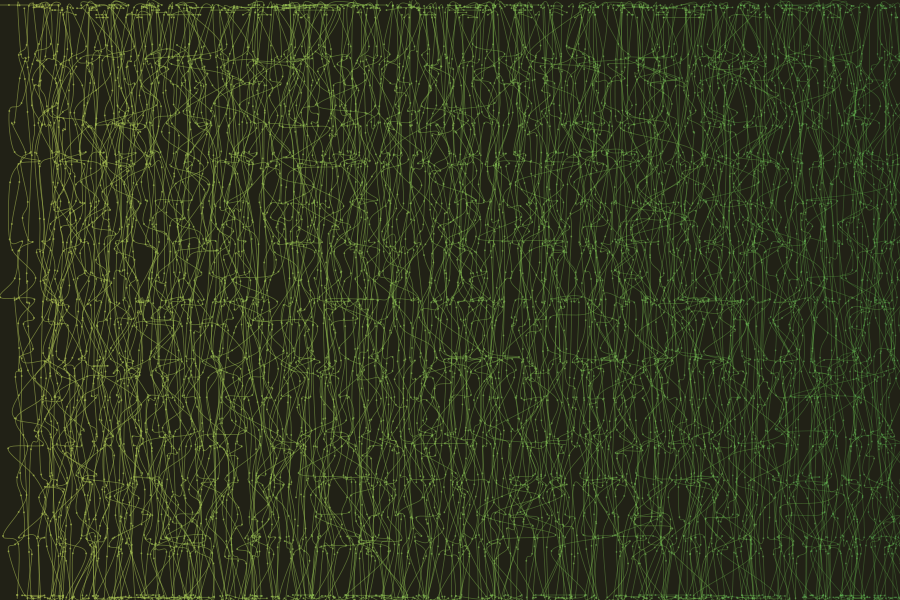

In [155]:
# adding dynamic changes to the score 
# create a function the determines dynamic fluctuation per pass of the canvas and dynamics for the piece
# - e.g. higher concentration of nodes and x variation at x1/width, x2/width, etc for one pass
# - higher conentration of nodes and x deviation centred on pass 7 of 11 (or 5 and 9 of 11), etc
# - also determine degree of concentration/increase

import random
import numpy as np

create_canvas(900, 600)

no_fill()
background(33,33,22)
stroke(150,200,100,233)
stroke_weight(0.33)

line_spacing = 33 # the distance that the vertical lines are apart

# initial pen position
x, y = 0, 0

def draw_line(x_random, sum_lin):
    # Draws a curve connecting a list points [[x1, y1], [x2, y2], ...]
    stroke_weight(0.75)
    no_fill() # stops lines being filled in as a shape
    begin_shape()
    for i in range(len(sum_lin)):
        curve_vertex(x + x_random[i], sum_lin[i] + y_offset)
    end_shape()

polyrhythm_nodes = [8,10,11,12,15] # 15:12:11:10:8 polyrhythm
line_calcs = []
summed_line = []

def calc_lines(): # separate into 2 functions calc and sum - better modularity?
    global line_calcs, summed_line

    line_calcs = []
    summed_line = []

    for lin in range(int(width/line_spacing)):
        summed_line.append([]) # create new nested array for each line
        
        # calculate y values for each component pulse in the polyrhythm 
        for i in range(len(polyrhythm_nodes)):
            calc_y = 5
            line_calcs.append([])
            for j in range(polyrhythm_nodes[i]):
                line_calcs[i].append(calc_y)
                calc_y += int((height-10)/polyrhythm_nodes[i])
                # print(calc_y)

        # sum calculated line nodes (todo: sum rhythms/patterns expressed via x vals) into 1 line
        for i in range(len(polyrhythm_nodes)):
            for j in range(polyrhythm_nodes[i]):
            # 1/3 chance that a pulse is selected for use per component pulse - random pattern generation
                node_select = np.random.normal(1.167,1.167) # resolution of polyrhthm - was random.uniform(0,2.33)
                # print(node_select) 
                node_chance = micro_node_density(draw_pass,x) + macro_node_density(draw_pass)
                if node_select < node_chance: 
                    summed_line[lin].append(line_calcs[i][j])

            if node_select < node_chance: 
                summed_line[lin].append(height-5)   

        summed_line[lin].sort() # not necessary, but good for readability 

'''
dynamics function:


how to apply gaussian distribution:
 - track current pass no. and line/node x val
 - determine the range and intensity of dynamic changes using gaussian dist
  - (also determine how high and low dynamics can go)
 - determine range of distribution - lowest and highest line x vals and pass no.s it applies to
 - if a line or pass falls within that range, scale (multiply?) the randomisation vals by its pos in the bell curve of the dist
  - also determine the intensity (val at centre of peak/bell) of each peak 
 - make the dynamic scale 0.0 to 1.0
  - at 1.0 it is at it's highest, at 0.0 (poss. < 0.01 or smth) it is a default
  - macro can range from 0.5 to 1.0 at it's peak/centre
  - micro can range from 0.167 to 0.667
  - in combination they can exceed 1.0

  - using random.normal(): 
   - the centre is the pass or x val where the peak will be
   - the range will be the number in passes or x val either side that I choose
    - use a separate random.normal() for each, as the ranges will be totally different numbers
   - the current pass and x val of a line/node will be tracked
   - every time it is updated (per pass or new node), the random.normal() is called:
   - if the line or pass == the number generated the dynamics are applied
   - this chance should increase as it reaches the centre and decrease when it is further away
   - to begin with use just one set of vals for the random params the dist is applied to
'''

macro_pos = 0
micro_pos = []
def dynamic_form(passes):
    fifths = [0,1,2,3,4,5]

    macro_pos = int((passes/5) * random_choice(fifths)) # gives which pass to centre gaussian dynamic peak on

    for p in range(passes): # do for each pass
        micro_pos.append([int((width/5) * random.choice(fifths))])

    print(macro_pos, micro_pos)
            
    return [macro_pos, micro_pos] 

def macro_x_variation(draw_pass):
    x_var_loc = 0
    x_var_scale = 0
    
    gaussian_dist = (int(np.random.normal(macro_pos, 2)))

    # print(gaussian_dist)

    if draw_pass == gaussian_dist:
        x_var_loc = 7
        x_var_scale = 12
    else:
        x_var_loc = 0
        x_var_scale = 0

    return [x_var_loc, x_var_scale]

def macro_node_density(draw_pass):
    node_density = 0.0
    
    gaussian_dist = (int(np.random.normal(macro_pos, 2)))

    # print(gaussian_dist)

    if draw_pass == gaussian_dist:
        node_density = 0.5
    else:
        node_density = 0.0

    return node_density

def micro_x_variation(draw_pass, current_x):
    x_var_loc = 7
    x_var_scale = 12

    gaussian_dist = (int(np.random.normal(micro_pos[draw_pass - 1], width/4))) # centre x val determined by dynamics(), range: 1/4 width of canvas either side(?)
        
    for r in range(50):           
        # add another conditional to determine intensity of dynamics?
        if int(current_x) == gaussian_dist + r or int(current_x) == gaussian_dist - r: # if gaussian_dist +/- small range?
            # print("dynamic x! :D")
            x_var_loc = 13
            x_var_scale = 21
            break # break out of loop once the correct value is found
        else: 
            x_var_loc = 4
            x_var_scale = 5

    return [x_var_loc, x_var_scale]

def micro_node_density(draw_pass, current_x):
    node_density = 1.0

    gaussian_dist = (int(np.random.normal(micro_pos[draw_pass - 1], width/4))) # centre x val determined by dynamics(), range: 1/4 width of canvas either side(?)
        
    for r in range(50):           
        # add another conditional to determine intensity of dynamics?
        if int(current_x) == gaussian_dist + r or int(current_x) == gaussian_dist - r: # if gaussian_dist +/- small range?
            # print("dynamic nodes! :D")
            node_density = 1.8
            break # break out of loop once the correct value is found
        else: 
            node_density = 0.8

    # print(node_density)

    return node_density

# calc_lines()

# print(summed_line)

y_offset = 0
def draw_circles():
    global x, r_val, g_val, alpha_val

    r_val = 170
    g_val = 186
    b_val = 80
    alpha_val = 155

    for lin in range(int(width/line_spacing)): 
        x_random = []

        for i in range(len(summed_line[lin])):
            stroke(r_val, g_val, 80, alpha_val)

            x_var_loc = micro_x_variation(draw_pass,x)[0] + macro_x_variation(draw_pass)[0]
            x_var_scale = micro_x_variation(draw_pass,x)[1] + macro_x_variation(draw_pass)[1]

            # print(x_var_loc, x_var_scale)

            x_random.append(np.random.normal(x_var_loc,x_var_scale)) 
            # generate randomised x vals, the same for each circle and equiv line bend and store in list
            
            stroke_weight(1)
            fill(r_val, g_val, b_val, alpha_val)
            circle(x + x_random[i], summed_line[lin][i] + y_offset, 1)#random.uniform(4,5))
            r_val -= 0.1
            g_val += 0.02
            b_val += 0.2
            alpha_val -= 0.125
            # print(r_val, g_val, b_val, alpha_val)

        draw_line(x_random, summed_line[lin])
        # store all x values for a line to be called at once in the draw_line() loop per line

        # move to the right
        x += line_spacing

num_passes = 11
draw_pass = 0
def draw_passes():
    global x, y_offset, draw_pass
    x_init = 11
    x_offset = 0

    x = x_init

    dynamic_form(num_passes)
    
    while draw_pass <= num_passes: # higher than division of ~line_spacing to cause overlap
        calc_lines()

        draw_circles()
        
        draw_pass += 1
        x_offset += (line_spacing*1.104)/7 # adding some interesting displacement in overlap
        y_offset += random.uniform(-1, 3)
        x = x_init + x_offset

    
draw_passes()

show()

In [9]:
# line tracing code - as basis/example

from py5canvas import *

def draw_path(points):
    # Draws a curve connecting a list points [[x1, y1], [x2, y2], ...]
    begin_shape()
    for j in range(len(points)):
        curve_vertex(points[j][0], points[j][1])
    end_shape()

create_canvas(900, 600)

no_fill()
background(0)
stroke(150,200,100,200)
stroke_weight(1)

line_spacing = 4       # the distance that the vertical lines are apart
point_spacing = 11    # the distance between points on a line

num_points = int((height / point_spacing))

# initial pen position
x, y = 1, 0

line_pts = []
line_rec = [[]]

x_vary = [0,0,0,random_uniform(-0.01, 0.025),random_uniform(0.01, 0.067)]
x_vary_subseq = [0,0,0,random_uniform(-0.001, 0.25),random_uniform(0.001, 3)]

# points for the first line

for _ in range(num_points):
    line_rec[0].append([x, y])
    y += point_spacing
    x += random_choice(x_vary)

# draw the first line
draw_path(line_rec[0])

# draw the remaining lines

line_rec_i = 0
x_offset = 0

while x < width:
    # start at the top
    y = 0
   
    x_offset += line_spacing
    
    # create the positions for the new line
    line_pts = []
    for j in range(num_points):
        x = line_rec[line_rec_i][j][0] + x_offset # add current x_offset to prev line contours
        x += random_choice(x_vary_subseq) # add random variation to the new line
        # x values = 0 value contours of prev line + correct offset for new line + random variation
        line_pts.append([x, y]) 
        y += point_spacing

    draw_path(line_pts)

    for j in range(num_points):
        line_pts[j][0] -= x_offset # remove current offset from current line

    line_rec.append(line_pts) # add 0 value line contours to record

    line_rec_i += 1

# show()